<a href="https://colab.research.google.com/github/CDspana/Rossmann-Store-Sales-Prediction/blob/main/Rossmann_Store_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Nov  8 22:16:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
train = pd.read_csv('/content//train.csv')
test = pd.read_csv('/content/test.csv')
store = pd.read_csv('/content/store.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [ ]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
train = train[train['Sales']>0]

In [ ]:
train.shape

(844338, 9)

In [ ]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [ ]:
dates = pd.to_datetime(train['Date']).sort_values()
dates = dates.unique()
start_date = dates[0]
end_date = dates[-1]
data_range = pd.date_range(start_date, end_date).values
print('Start date: {}'.format(start_date))
print('End date: ', end_date)
#print('Data Range: ', data_range)

Start date: 2013-01-01T00:00:00.000000000
End date:  2015-07-31T00:00:00.000000000


#**Visualization**

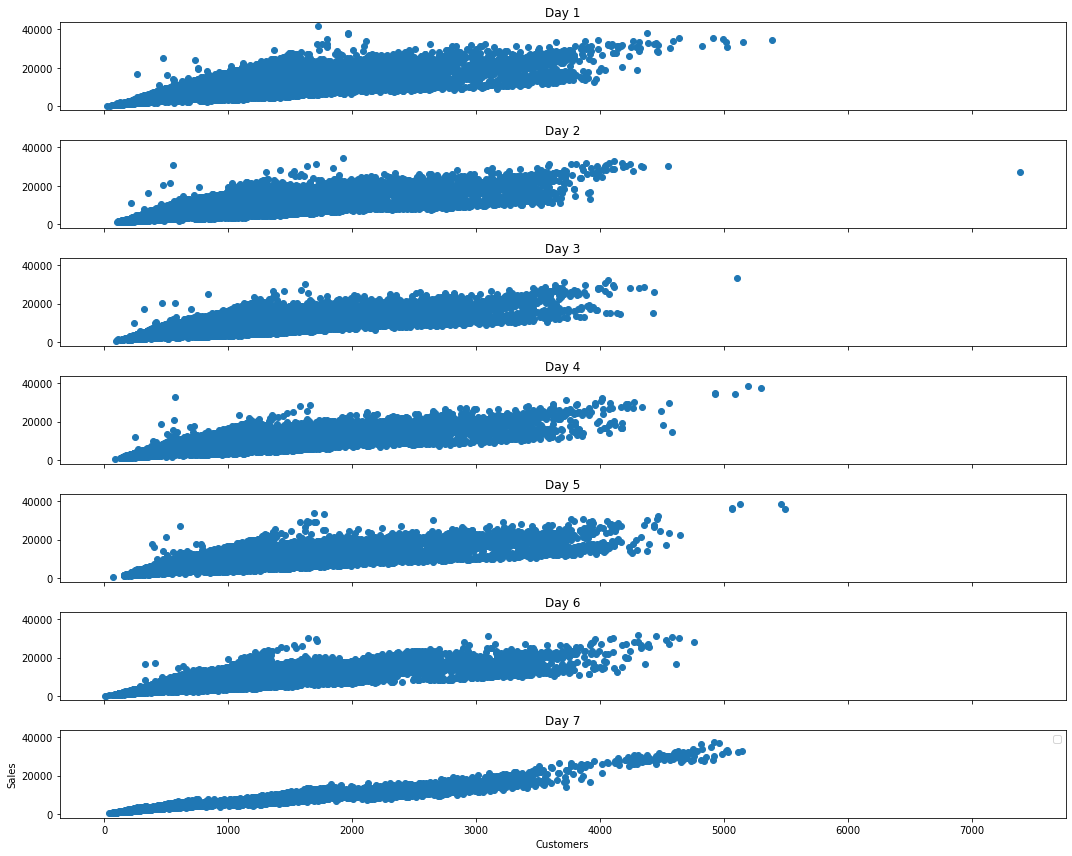

In [ ]:
f, ax = plt.subplots(7, figsize=(15, 12), sharex=True, sharey=True)
for i in range(1, 8):
  data = train[train['DayOfWeek'] == i]
  ax[i - 1].set_title('Day {}'.format(i))
  ax[i - 1].scatter(data['Customers'], data['Sales'])

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


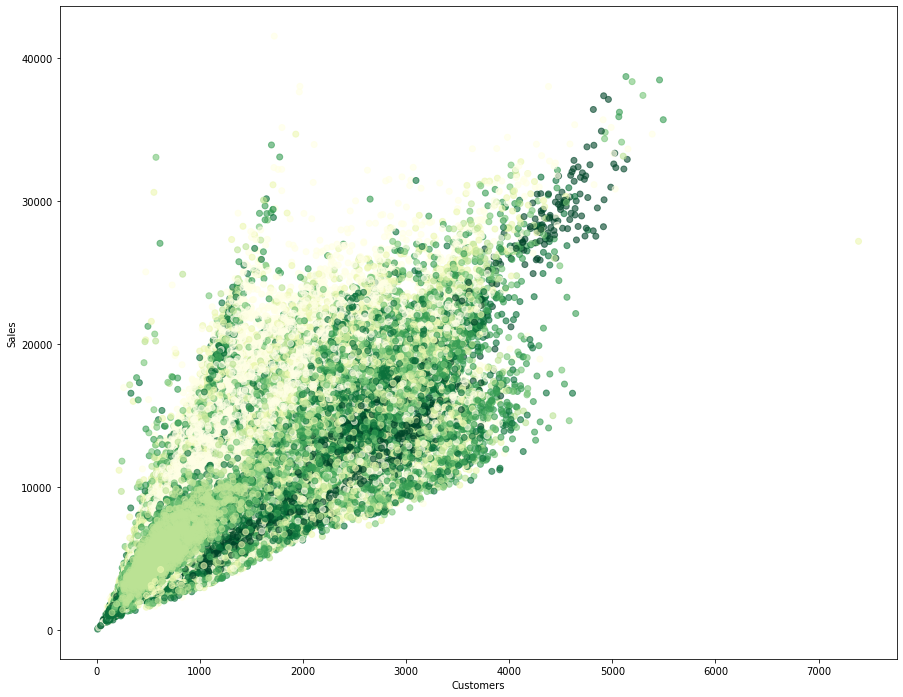

In [ ]:
plt.rcParams['figure.figsize'] = (15.0, 12.0)

plt.scatter(train['Customers'], train['Sales'], c=train['DayOfWeek'], alpha = 0.6, cmap=plt.cm.get_cmap('YlGn'))

plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

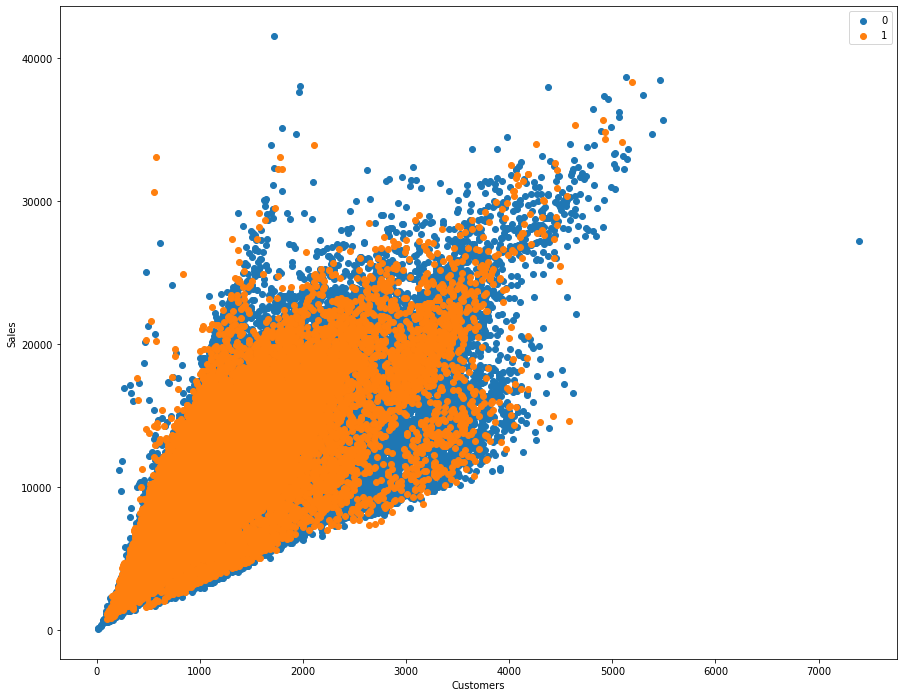

In [ ]:
for i in [0, 1]:
  data = train[train['SchoolHoliday'] == i]
  plt.scatter(data['Customers'], data['Sales'], label = i)

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

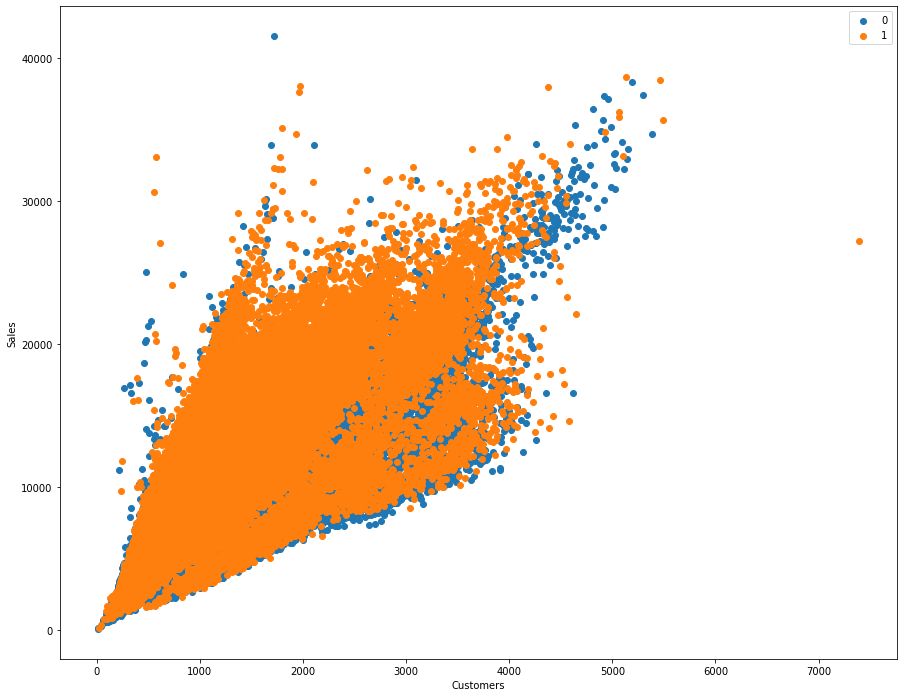

In [ ]:
for i in [0, 1]:
  data = train[train['Promo'] == i]
  plt.scatter(data['Customers'], data['Sales'], label = i)

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

In [ ]:
train['SalesPerCustomer'] = train['Sales'] / train['Customers']
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,8.626118
...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,5.962898
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,4.528818
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,4.034455
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,4.322425


In [ ]:
avg_store = train.groupby('Store')[['Sales', 'Customers', 'SalesPerCustomer']].mean()
avg_store.columns = ['Avg_' + x for x in avg_store.columns]
store = pd.merge(avg_store.reset_index(), store, on = 'Store')
store

,Store,Avg_Sales,Avg_Customers,Avg_SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4759.096031,564.049936,8.393038,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,4953.900510,583.998724,8.408443,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,6942.568678,750.077022,9.117599,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,9638.401786,1321.752551,7.249827,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,4676.274711,537.340180,8.611229,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,5251.702182,451.711168,11.547388,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,10236.577664,838.608472,11.993853,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,6627.859694,717.029337,9.211189,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,20666.562500,3200.946429,6.454992,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


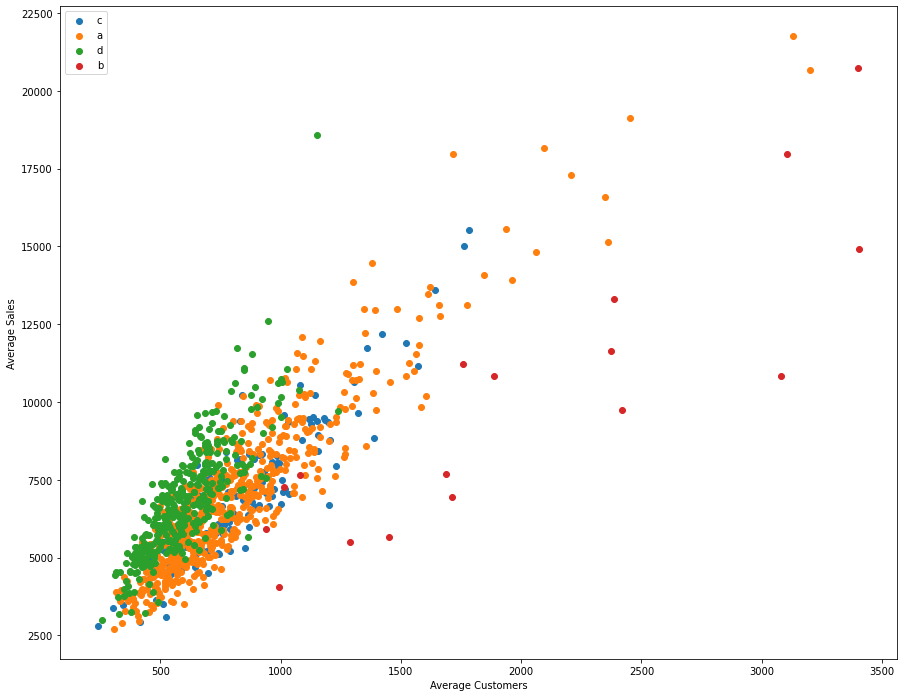

In [ ]:
for i in store['StoreType'].unique():
  data = store[store['StoreType'] == i]
  plt.scatter(data['Avg_Customers'], data['Avg_Sales'], label = i)

plt.legend()
plt.xlabel('Average Customers')
plt.ylabel('Average Sales')
plt.show()

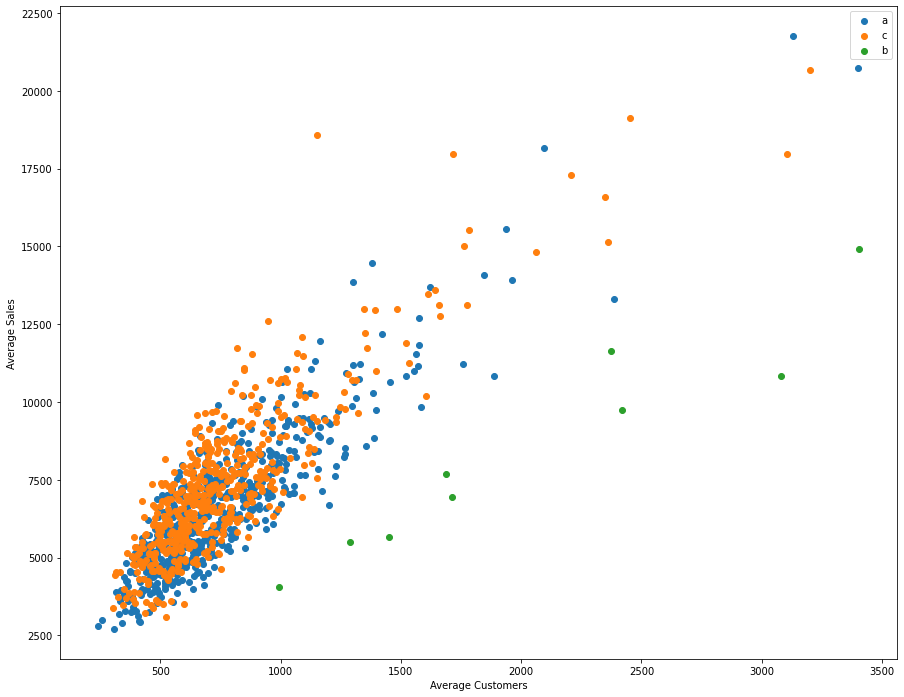

In [ ]:
for i in store['Assortment'].unique():
  data = store[store['Assortment'] == i]
  plt.scatter(data['Avg_Customers'], data['Avg_Sales'], label = i)

plt.legend()
plt.xlabel('Average Customers')
plt.ylabel('Average Sales')
plt.show()

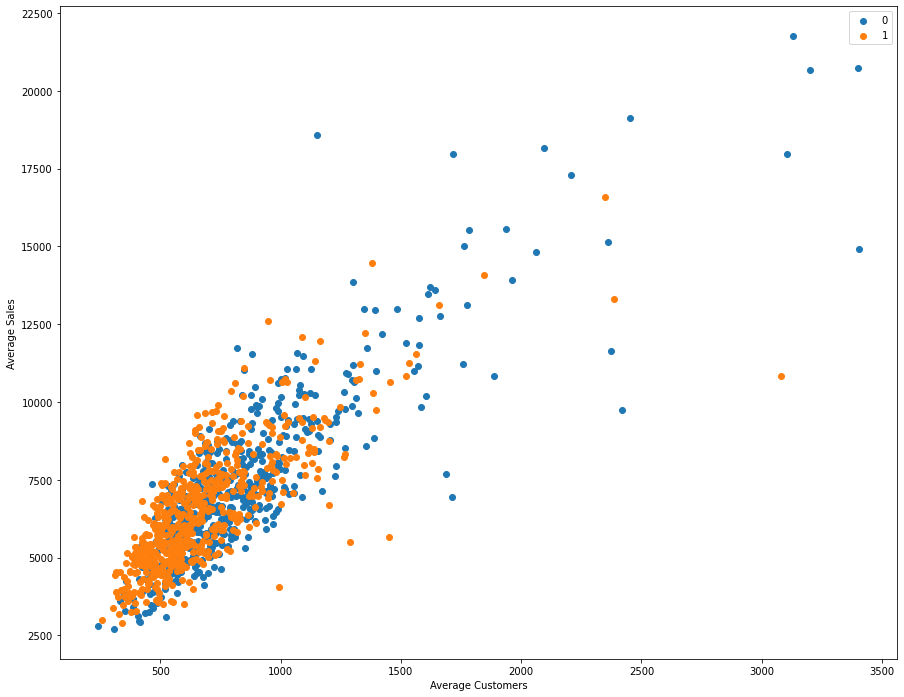

In [ ]:
for i in store['Promo2'].unique():
  data = store[store['Promo2'] == i]
  plt.scatter(data['Avg_Customers'], data['Avg_Sales'], label = i)

plt.legend()
plt.xlabel('Average Customers')
plt.ylabel('Average Sales')
plt.show()

#**Feature Engineering**

In [ ]:
store.isnull().sum()

Store                          0
Avg_Sales                      0
Avg_Customers                  0
Avg_SalesPerCustomer           0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

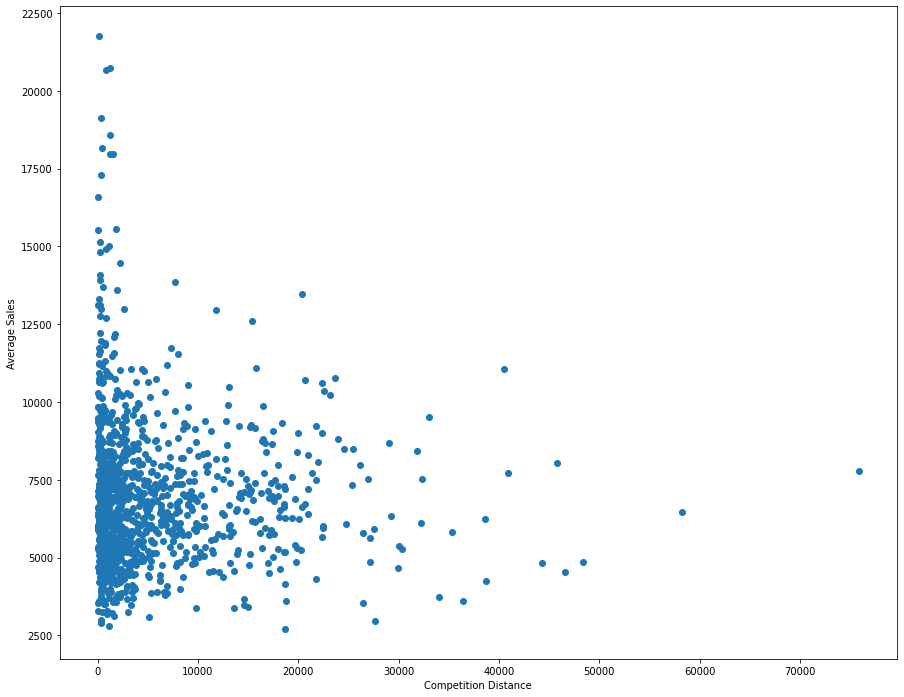

In [ ]:
store['CompetitionDistance'].fillna(-1)
plt.scatter(store['CompetitionDistance'], store['Avg_Sales'])
plt.xlabel('Competition Distance')
plt.ylabel('Average Sales')
plt.show()

In [ ]:
store

,Store,Avg_Sales,Avg_Customers,Avg_SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4759.096031,564.049936,8.393038,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,4953.900510,583.998724,8.408443,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,6942.568678,750.077022,9.117599,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,9638.401786,1321.752551,7.249827,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,4676.274711,537.340180,8.611229,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,5251.702182,451.711168,11.547388,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,10236.577664,838.608472,11.993853,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,6627.859694,717.029337,9.211189,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,20666.562500,3200.946429,6.454992,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
store.dtypes

Store                          int64
Avg_Sales                    float64
Avg_Customers                float64
Avg_SalesPerCustomer         float64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [ ]:
store['Assortment'] = store['Assortment'].astype('category').cat.codes
store['StoreType'] = store['StoreType'].astype('category').cat.codes
train['StateHoliday'] = train['StateHoliday'].astype('category').cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
store.dtypes

Store                          int64
Avg_Sales                    float64
Avg_Customers                float64
Avg_SalesPerCustomer         float64
StoreType                       int8
Assortment                      int8
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [ ]:
merged = pd.merge(train, store, on = 'Store', how = 'left')
merged

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,...,Avg_SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,1,1,9.482883,...,8.393038,2,0,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,1,1,9.702400,...,8.408443,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,1,1,10.126675,...,9.117599,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,1,1,9.342457,...,7.249827,2,2,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,1,1,8.626118,...,8.611229,0,0,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,2013-01-01,3375,566,1,0,2,1,5.962898,...,6.275582,1,0,150.0,9.0,2006.0,0,NaN,NaN,NaN
844334,733,2,2013-01-01,10765,2377,1,0,2,1,4.528818,...,4.392113,1,1,860.0,10.0,1999.0,0,NaN,NaN,NaN
844335,769,2,2013-01-01,5035,1248,1,0,2,1,4.034455,...,3.527029,1,1,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
844336,948,2,2013-01-01,4491,1039,1,0,2,1,4.322425,...,4.023215,1,1,1430.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
merged.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
SalesPerCustomer                  0
Avg_Sales                         0
Avg_Customers                     0
Avg_SalesPerCustomer              0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268600
CompetitionOpenSinceYear     268600
Promo2                            0
Promo2SinceWeek              423292
Promo2SinceYear              423292
PromoInterval                423292
dtype: int64

In [ ]:
merged.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                    int8
SchoolHoliday                  int64
SalesPerCustomer             float64
Avg_Sales                    float64
Avg_Customers                float64
Avg_SalesPerCustomer         float64
StoreType                       int8
Assortment                      int8
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [ ]:
merged.fillna(0, inplace = True)
merged.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
SalesPerCustomer             0
Avg_Sales                    0
Avg_Customers                0
Avg_SalesPerCustomer         0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
merged['Date'] = pd.to_datetime(merged['Date'])
merged.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                           int8
SchoolHoliday                         int64
SalesPerCustomer                    float64
Avg_Sales                           float64
Avg_Customers                       float64
Avg_SalesPerCustomer                float64
StoreType                              int8
Assortment                             int8
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

In [ ]:
merged['Year'] = merged.Date.dt.year
merged['Month'] = merged.Date.dt.month
merged['Week'] = merged.Date.dt.week
merged['Day'] = merged.Date.dt.day
merged

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Week,Day
0,1,5,2015-07-31,5263,555,1,1,1,1,9.482883,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,1,1,9.702400,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,1,1,10.126675,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,1,1,9.342457,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,1,1,8.626118,...,4.0,2015.0,0,0.0,0.0,0,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,2013-01-01,3375,566,1,0,2,1,5.962898,...,9.0,2006.0,0,0.0,0.0,0,2013,1,1,1
844334,733,2,2013-01-01,10765,2377,1,0,2,1,4.528818,...,10.0,1999.0,0,0.0,0.0,0,2013,1,1,1
844335,769,2,2013-01-01,5035,1248,1,0,2,1,4.034455,...,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1
844336,948,2,2013-01-01,4491,1039,1,0,2,1,4.322425,...,0.0,0.0,0,0.0,0.0,0,2013,1,1,1


In [ ]:
ventas = merged.loc[merged['Year'] == 2013, ['Sales', 'Store', 'Month']].reset_index(drop = True)
n = ventas.groupby('Store')[['Sales']].sum()
n

,Sales
Store,
1,1491140
2,1488164
3,2128265
4,2852667
5,1420228
...,...
1111,1645177
1112,3433630
1113,1988864


In [ ]:
n.iloc[0:10, 0].mean()

1880880.6

In [ ]:
ventas2 = merged.loc[merged['Year'] == 2014, ['Sales', 'Store', 'Month']].reset_index(drop = True)
n2 = ventas2.groupby('Store')[['Sales']].sum()
n2

,Sales
Store,
1,1433408
2,1516432
3,2072949
4,2971989
5,1406465
...,...
1111,1587030
1112,2926635
1113,2043271


In [ ]:
n2.iloc[0:10, 0].mean()

1914994.3

In [ ]:
from scipy import stats
import scipy
import statsmodels.api as sm

In [ ]:
test, pvalor = stats.ttest_rel(n.iloc[0:10, 0], n2.iloc[0:10, 0])
print(test, pvalor)

-0.6126115204395359 0.5552941644074678


In [ ]:
pvalor < 0.005

False

In [ ]:
merged['MonthsCompetitionOpen'] = 12 * (merged['Year'] - merged['CompetitionOpenSinceYear']) + (merged['Month'] - merged['CompetitionOpenSinceMonth'])
merged.loc[merged['CompetitionOpenSinceYear'] == 0, 'MonthsCompetitionOpen'] = 0

In [ ]:
merged['WeeksPromoOpen'] = 12 * (merged['Year'] - merged['Promo2SinceYear']) + (merged['Date'].dt.weekofyear - merged['Promo2SinceWeek'])
merged.loc[merged['Promo2SinceYear'] == 0, 'WeeksPromoOpen'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [ ]:
merged.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                           int8
SchoolHoliday                         int64
SalesPerCustomer                    float64
Avg_Sales                           float64
Avg_Customers                       float64
Avg_SalesPerCustomer                float64
StoreType                              int8
Assortment                             int8
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
Year                            

In [ ]:
toInt = [
        'CompetitionOpenSinceMonth',
        'CompetitionOpenSinceYear',
        'Promo2SinceWeek', 
        'Promo2SinceYear', 
        'MonthsCompetitionOpen', 
        'WeeksPromoOpen']

merged[toInt] = merged[toInt].astype(int)

In [ ]:
med_store = train.groupby('Store')[['Sales', 'Customers', 'SalesPerCustomer']].median()
med_store.columns = ['Med' + x for x in med_store.columns]

store = pd.merge(med_store.reset_index(), store, on='Store')
store

,Store,MedSales,MedCustomers,MedSalesPerCustomer,Avg_Sales,Avg_Customers,Avg_SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4647.0,550.0,8.362376,4759.096031,564.049936,8.393038,2,0,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,4783.0,575.5,8.313092,4953.900510,583.998724,8.408443,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,6619.0,744.0,9.123440,6942.568678,750.077022,9.117599,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,9430.5,1301.5,7.215175,9638.401786,1321.752551,7.249827,2,2,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,4616.0,564.0,8.584677,4676.274711,537.340180,8.611229,0,0,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,5028.0,453.0,11.550661,5251.702182,451.711168,11.547388,0,0,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,9410.0,799.0,11.765432,10236.577664,838.608472,11.993853,2,2,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,6354.5,700.0,9.163448,6627.859694,717.029337,9.211189,0,2,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,20412.5,3179.5,6.427373,20666.562500,3200.946429,6.454992,0,2,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
merged = pd.merge(med_store.reset_index(), merged, on='Store')
merged.head()

,Store,MedSales,MedCustomers,MedSalesPerCustomer,DayOfWeek,Date,Sales,Customers,Open,Promo,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Week,Day,MonthsCompetitionOpen,WeeksPromoOpen
0,1,4647.0,550.0,8.362376,5,2015-07-31,5263,555,1,1,...,0,0,0,0,2015,7,31,31,82,0
1,1,4647.0,550.0,8.362376,4,2015-07-30,5020,546,1,1,...,0,0,0,0,2015,7,31,30,82,0
2,1,4647.0,550.0,8.362376,3,2015-07-29,4782,523,1,1,...,0,0,0,0,2015,7,31,29,82,0
3,1,4647.0,550.0,8.362376,2,2015-07-28,5011,560,1,1,...,0,0,0,0,2015,7,31,28,82,0
4,1,4647.0,550.0,8.362376,1,2015-07-27,6102,612,1,1,...,0,0,0,0,2015,7,31,27,82,0


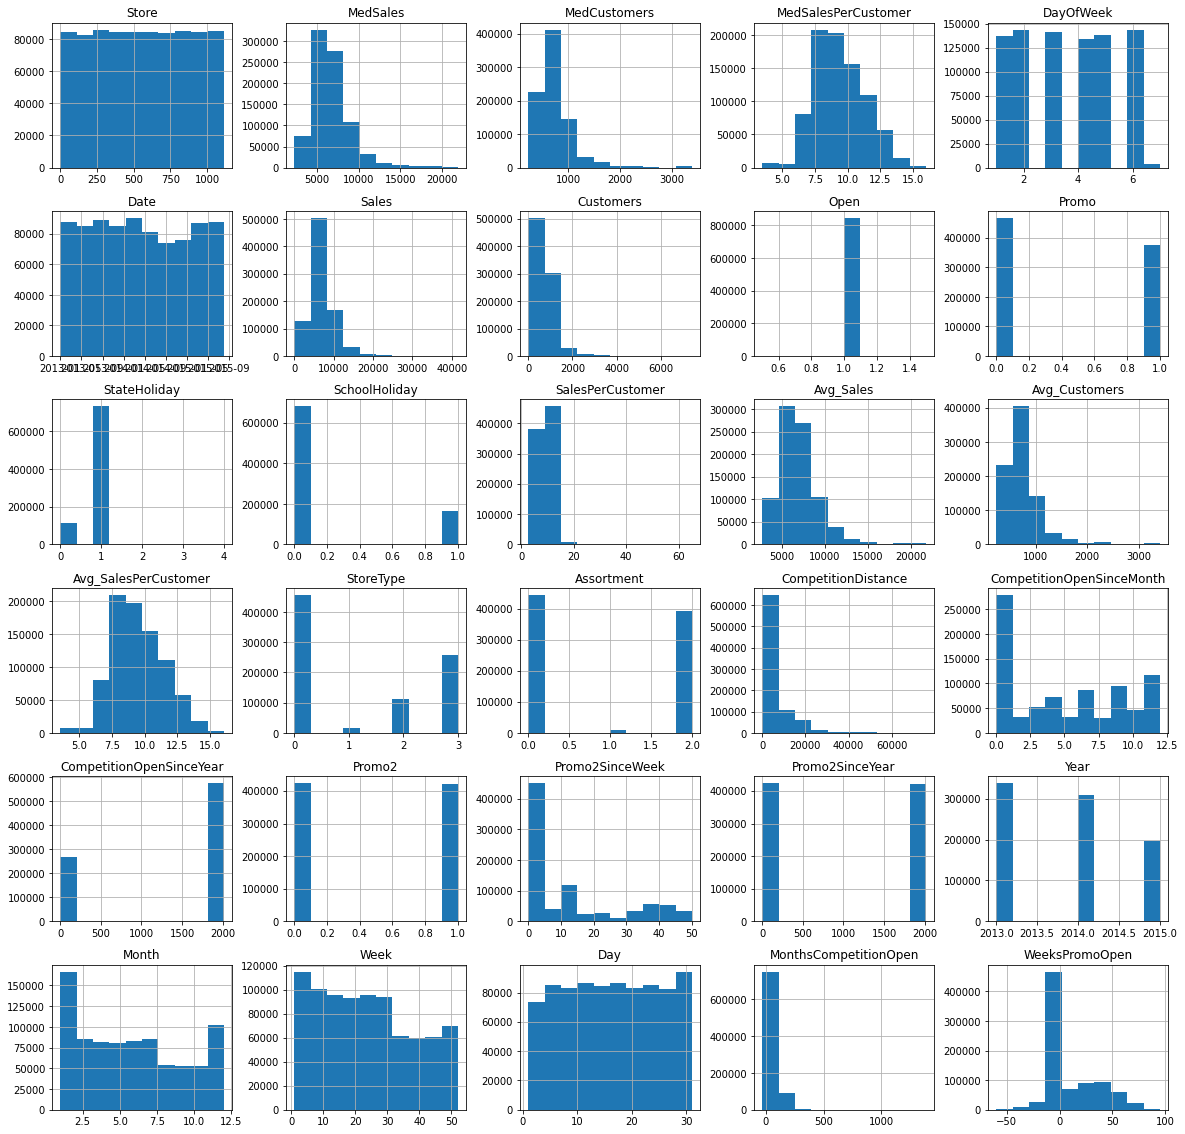

In [ ]:
merged.hist(figsize=(20,20))
plt.show()

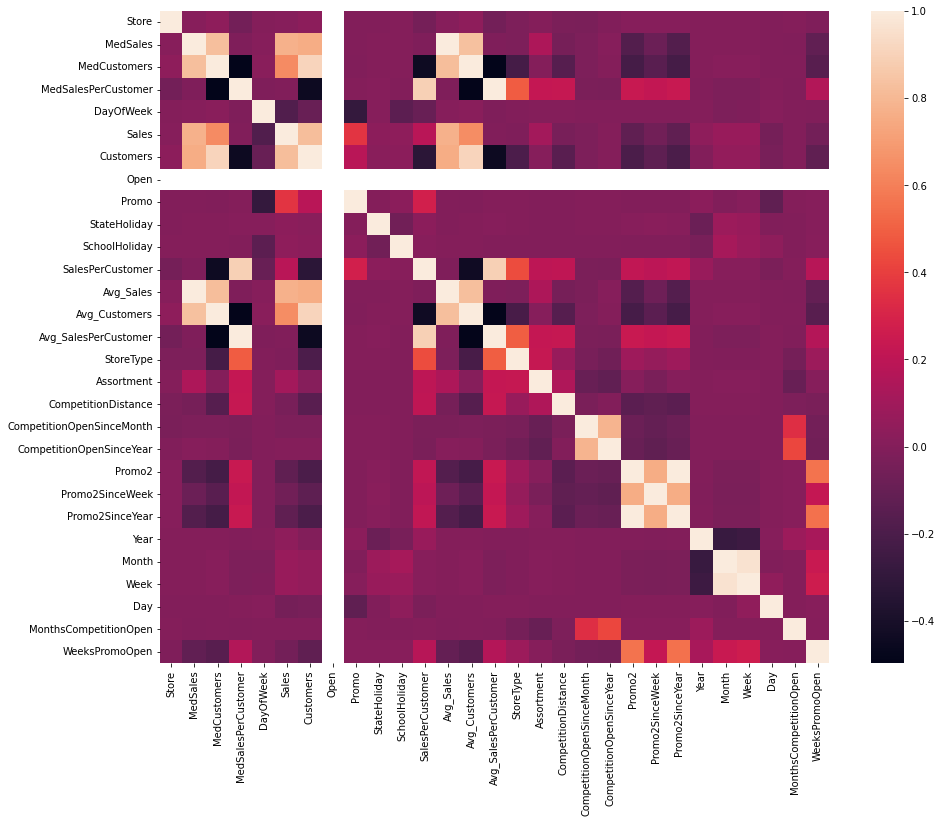

In [ ]:
import seaborn as sns
sns.heatmap(merged.corr())

#Model Building and Evaluation

In [ ]:
merged.dtypes

Store                                 int64
MedSales                            float64
MedCustomers                        float64
MedSalesPerCustomer                 float64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                           int8
SchoolHoliday                         int64
SalesPerCustomer                    float64
Avg_Sales                           float64
Avg_Customers                       float64
Avg_SalesPerCustomer                float64
StoreType                              int8
Assortment                             int8
CompetitionDistance                 float64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                                int64
Promo2SinceWeek                 

In [ ]:
from sklearn.model_selection import train_test_split
X = [
    'Store', 
    'Customers',
    'CompetitionDistance', 

    'Promo', 
    'Promo2', 

    'CompetitionOpenSinceMonth',
    'CompetitionOpenSinceYear',
    'Promo2SinceWeek',
    'Promo2SinceYear',

    
    'StateHoliday',
    'StoreType',
    'Assortment',

    'Avg_Sales',
    'Avg_Customers',
    'Avg_SalesPerCustomer',
    
    'MedSales',
    'MedCustomers',
    'MedSalesPerCustomer',

    'DayOfWeek',
    'Week',
    'Day',
    'Month',
    'Year',

]
X_data = merged[X]
Y_data = np.log(merged['Sales'])
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.20, random_state=10)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,mean_squared_error



def plot_importance(model):
    k = list(zip(X, model.feature_importances_))
    k.sort(key=lambda tup: tup[1])

    labels, vals = zip(*k)
    
    plt.barh(np.arange(len(X)), vals, align='center')
    plt.yticks(np.arange(len(X)), labels)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param ={
            'n_estimators': [100],
            'max_depth':[2,4,6]
        }

xgboost_tree = xgb.XGBRegressor()

grid = GridSearchCV(estimator=xgboost_tree,param_grid=param,cv=5,  verbose=1, n_jobs=-1,scoring='neg_mean_squared_error')
   
    

    
grid_result = grid.fit(X_train, y_train)
best_params = grid_result.best_params_

print('Best Params :',best_params)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[22:23:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Params : {'max_depth': 6, 'n_estimators': 100}


In [ ]:
from math import sqrt

pred = grid_result.predict(X_test)
print('Root Mean squared error {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred)))))

Root Mean squared error 433.7519410666648
